# Gini Impurity

Use python and numpy to write a function, `gini()` that takes in 4 values `LNP`, `LNN`, `RNP`, `RNN` (LN = left node, RN = right node, P is for positive/1, N is for negative/0) and returns the gini impurity for that split.

<img src="https://drive.google.com/uc?id=1MQEeJDxxcV8zmhzBgaDZ2QY0Ng8z8hz8" width=400/>


In [45]:
import numpy as np

def gini(P,N):
    Total = P + N # total count in Node
    P_p = P/Total # Probability of Positives
    N_p = N/Total # Probability of Negatives
    return(1-(P_p**2 + N_p**2))

#write function here---------------
def gini_split(LNP, LNN, RNP, RNN):
    
    all_data_count = LNP + LNN + RNP + RNN
    left_node_count = LNP + LNN
    right_node_count = RNP + RNN
    
    gini_L =  gini(LNP, LNN) #gini on Left Node
    gini_R = gini(RNP, RNN) #gini on Right node
    
    gini_split = ((left_node_count/all_data_count)*gini_L +
            (right_node_count/all_data_count)*gini_R) #weighted average of gini impurity of each node
    
    return(gini_split)

gini_split(LNP = 10, LNN = 5, RNP = 2, RNN = 12)
#----------------------------------
# gini(LNP = 10, LNN = 5, RNP = 2, RNN = 12) should return approx 0.3481117

0.34811165845648606

In [46]:
import scipy.stats as st
def entropy(P,N):
    Total = P + N # total count in Node
    P_p = P/Total # Probability of Positives
    N_p = N/Total # Probability of Negatives
    return(-(P_p*np.log2(P_p) + N_p*np.log2(N_p)))
    
    
def entropy_split(LNP, LNN, RNP, RNN):
    
    all_data_count = LNP + LNN + RNP + RNN
    left_node_count = LNP + LNN
    right_node_count = RNP + RNN

#     echeck = (left_node_count/all_data_count)*st.entropy([LNP, LNN], base = 2) + (right_node_count/all_data_count)*st.entropy([RNP, RNN], base = 2)
#     print(echeck)
    
    e_L_check = st.entropy([LNP, LNN], base = 2)
    e_L = entropy(LNP,LNN) #entropy Left Node
    e_R = entropy(RNP,RNN) #entropy Right Node
    
    e = ((left_node_count/all_data_count)*e_L +
         (right_node_count/all_data_count)*e_R) #weighted average of entropy
    
    return(e)

    
entropy_split(LNP = 10, LNN = 5, RNP = 2, RNN = 12)
    

0.760615738309308

# 2. Build a Categorical Decision Tree

In [47]:
# Load Mushroom Data------------------------------------
import pandas as pd

# see this site for what variables mean: http://archive.ics.uci.edu/ml/datasets/Mushroom
mush = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")

mush.columns = ['poison','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
                'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type',
                'spore-print-color', 'population', 'habitat']

mush.head()

,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


For your sanity, let's restrict our dataset to 2 predictor variables...

In [48]:
mush_small = mush[["poison", "bruises", "gill-size"]]

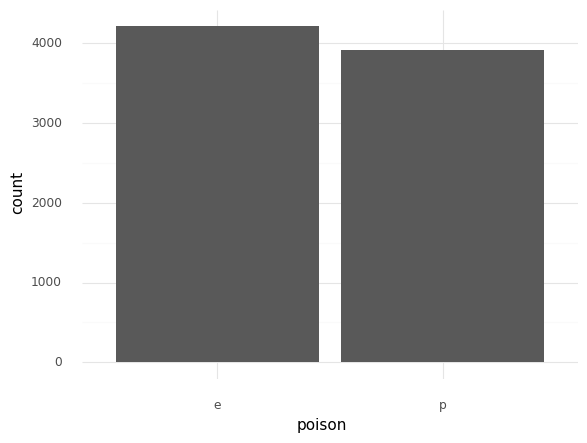

<ggplot: (8761954451475)>

In [49]:
# make a bar plot of edible/poisonous mushrooms
from plotnine import *
ggplot(mush_small, aes("poison")) + geom_bar() + theme_minimal()

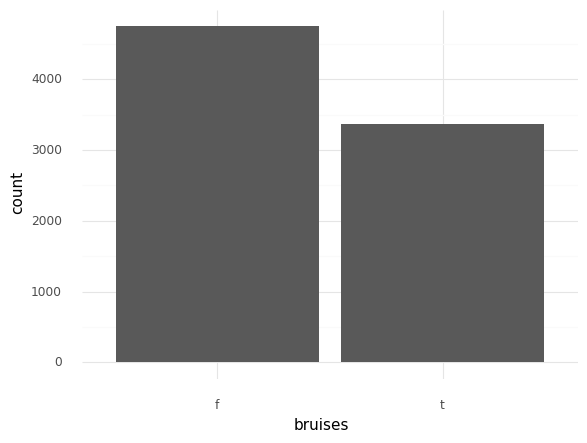

<ggplot: (8761954397889)>

In [50]:
# make a bar plot of bruised/not-bruised mushrooms
ggplot(mush_small, aes("bruises")) + geom_bar() + theme_minimal()

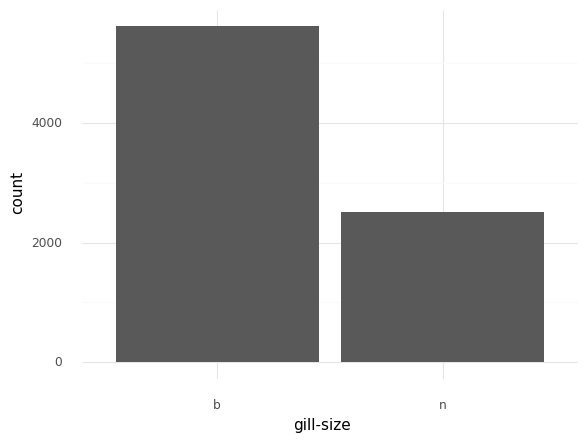

<ggplot: (8761954891734)>

In [51]:
# make a bar plot of broad/narrow gilled mushrooms
ggplot(mush_small, aes("gill-size")) + geom_bar() + theme_minimal()

## 2.1 Build!

Use the functions you built earlier to build a decision tree that classifies each data point as either edible (`e`) or poisonous (`p`). You can choose to either use entropy or gini impurity. 

### 2.1.1 Layer 1

Choose which variable to use to split the first layer

In [52]:
# create a dictionary of poison counts for each predictor---

poison_count = {"e": mush_small.loc[mush_small.poison == "e"].shape[0],
                "p": mush_small.loc[mush_small.poison == "p"].shape[0]}
print(poison_count)

gini(poison_count["e"], poison_count["p"])

{'e': 4208, 'p': 3915}


0.49934946249669365

In [53]:
# calculate impurity/entropy (choose one metric) of each possible split---
bruise_NodeF = mush_small.loc[mush_small.bruises == "f"] #node with bruise = F
bruise_NodeT = mush_small.loc[mush_small.bruises == "t"] #node with bruise = T

bruise_impurity_dict = {"f": {"e": bruise_NodeF[bruise_NodeF.poison == "e"].shape[0],
                              "p": bruise_NodeF.loc[bruise_NodeF.poison == "p"].shape[0]},
                        "t": {"e": bruise_NodeT[bruise_NodeT.poison == "e"].shape[0],
                              "p": bruise_NodeT.loc[bruise_NodeT.poison == "p"].shape[0]},}

bruise_impurity_dict

{'f': {'e': 1456, 'p': 3292}, 't': {'e': 2752, 'p': 623}}

In [54]:
gill_NodeB = mush_small.loc[mush_small["gill-size"] == "b"] #node with gill = b
gill_NodeN = mush_small.loc[mush_small["gill-size"] == "n"] #node with gill = n

gill_impurity_dict = {"b": {"e": gill_NodeB[gill_NodeB.poison == "e"].shape[0],
                              "p": gill_NodeB.loc[gill_NodeB.poison == "p"].shape[0]},
                        "n": {"e": gill_NodeN[gill_NodeN.poison == "e"].shape[0],
                              "p": gill_NodeN.loc[gill_NodeN.poison == "p"].shape[0]},}

gill_impurity_dict

{'b': {'e': 3920, 'p': 1692}, 'n': {'e': 288, 'p': 2223}}

In [55]:
# choose which split improves prediction most---
gini_bruise = gini_split(bruise_impurity_dict["f"]["e"], bruise_impurity_dict["f"]["p"],
                  bruise_impurity_dict["t"]["e"], bruise_impurity_dict["t"]["p"])
gini_bruise

0.37363252569361594

In [56]:
# gini_gill
gini_gill = gini_split(gill_impurity_dict["b"]["e"], gill_impurity_dict["b"]["p"],
                gill_impurity_dict["n"]["e"], gill_impurity_dict["n"]["p"])

gini_gill

0.3537695848523329

Splitting on Gill minimizes the gini impurity, so we will use this split.

### 2.1.3 Create Classifications

Pretend that this decision stump (a decision tree with only one layer) is your final tree. Generate the classification for each data point and store it in `mush_small`.

In [57]:
# classification---

# re define these, but they're also defined above!
gill_NodeB = mush_small.loc[mush_small["gill-size"] == "b"] #node with gill = b
gill_NodeN = mush_small.loc[mush_small["gill-size"] == "n"] #node with gill = n

gill_impurity_dict = {"b": {"e": gill_NodeB[gill_NodeB.poison == "e"].shape[0],
                              "p": gill_NodeB.loc[gill_NodeB.poison == "p"].shape[0]},
                        "n": {"e": gill_NodeN[gill_NodeN.poison == "e"].shape[0],
                              "p": gill_NodeN.loc[gill_NodeN.poison == "p"].shape[0]},}

gill_impurity_dict

# these are our two nodes from this decision stump.
# check which category we should classify each node as:
# NodeB has more edible mushrooms, we we'll classify all data points in this node as edible
# NodeN has more poisonous mushrooms, we we'll classify all data points in this node as poison


# add classifications to dataframe
mush_small["class"] = ["e" if x == "b" else "p" for x in mush_small["gill-size"]]

<ipython-input-57-93f79bc9527e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mush_small["class"] = ["e" if x == "b" else "p" for x in mush_small["gill-size"]]


### 2.1.4 Calculate Accuracy

Count how often your model was correct. How well did your model do?

In [58]:
# accuracy----
np.mean(mush_small["poison"] == mush_small["class"])

0.7562476917395051

 greater than 75% accuracy!